In [1]:
# make all necessary imports....
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [10]:
dir_info_files = '/astro/store/scratch/tmp/suberlak/S13Agg/repo_fls/'
dir_save_merged= '/astro/users/suberlak/S13Agg_analysis/data_products/'

# the ugriz photometry is already extinction-corrected  
# we read in only those objects whose parents are brighter than 17 mag 
data_source = 'NCSA'
name_keep = 'test_'+data_source+'_all_patches_ugriz_var.csv'
name_detection = 'DeepSource'+data_source+'_i_lt235.csv.gz'
ncsa_photometry_data = pd.read_csv(dir_save_merged+name_keep)
ncsa_detection_data = pd.read_csv(dir_info_files+name_detection)

# merge in the extendedness, ra, dec, extendedness   (there is psfFlux and ModelFlux,  but not modelMag.  To translate 
# that to modelMag would need to convert the flux to magnitudes - as long as I'm, using the same threshold for extendedness 
# as Yusra, it is not needed)

merged_ncsa = pd.merge(photometry_data, ncsa_detection_data[['deepSourceId', 'ra', 'decl', 'extendedness']], 
                       how='left', left_on='objectId', right_on='deepSourceId')


data_source = 'IN2P3'
name_keep = 'test_'+data_source+'_all_patches_ugriz_var.csv'
name_detection = 'DeepSource'+data_source+'_i_lt235.csv.gz'
intpt_photometry_data = pd.read_csv(dir_save_merged+name_keep)
intpt_detection_data = pd.read_csv(dir_info_files+name_detection)

# merge in the extendedness, ra, dec, extendedness  
merged_intpt = pd.merge(intpt_photometry_data, intpt_detection_data[['deepSourceId', 'ra', 'decl', 'extendedness']], 
                       how='left', left_on='objectId', right_on='deepSourceId')



In [ ]:
# make sure that both have the same columns 
assert merged_ncsa.column == merged_intpt.columns 

# combine data from NCSA and IN2P3  
merged_all = merged_ncsa.append(merged_intpt)


In [17]:
for j in range(1,4):
    print j 

1
2
3


In [16]:
max(merged_data['ra'].values[np.isfinite(merged_data['ra'].values)])

359.8798649100425

In [13]:
np.sum(np.in1d(photometry_data['objectId'].values, detection_to_merge['deepSourceId'].values))

10947

In [18]:
import corner
import numpy as np

In [32]:
data.shape


(50000, 3)

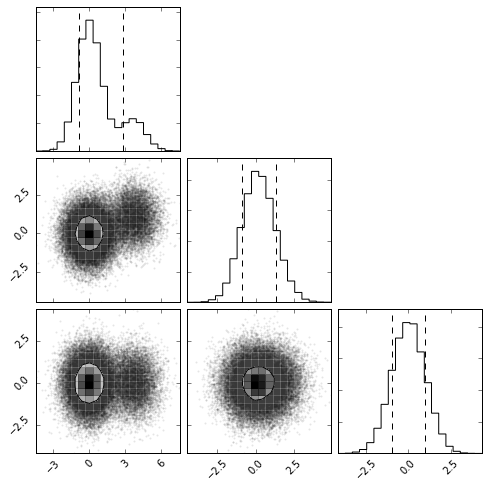

In [27]:
%matplotlib inline 

# Set up the parameters of the problem.
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
data = np.vstack([data1, data2])

fig = corner.corner(data, quantiles=(0.16, 0.84), levels=(1-np.exp(-0.5),))
